In [33]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [34]:
df = pd.read_csv("Student_Performance.csv")

In [35]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [49]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [37]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [38]:
df.sample()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
68,9,94,No,9,1,91.0


In [39]:
df.groupby("Hours Studied")

<Axes: xlabel='Extracurricular Activities', ylabel='Count'>

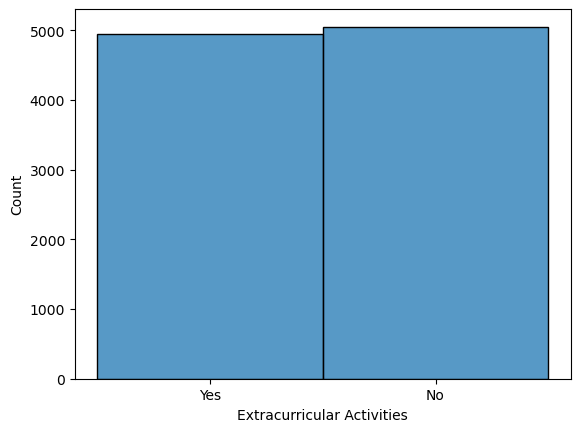

In [46]:
sns.histplot(x="Extracurricular Activities" ,data=df ,bins=15)

<Axes: xlabel='Sleep Hours'>

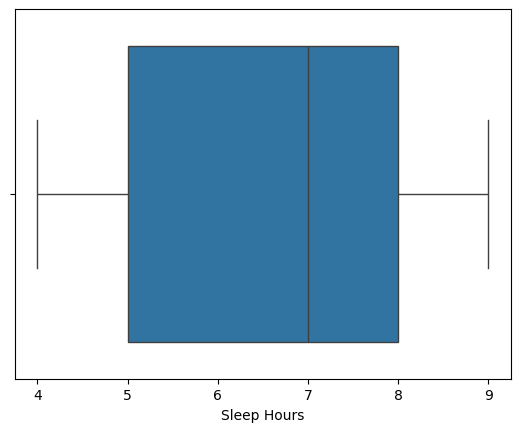

In [50]:
sns.boxplot(x="Sleep Hours" , data=df)

<Axes: xlabel='Extracurricular Activities', ylabel='count'>

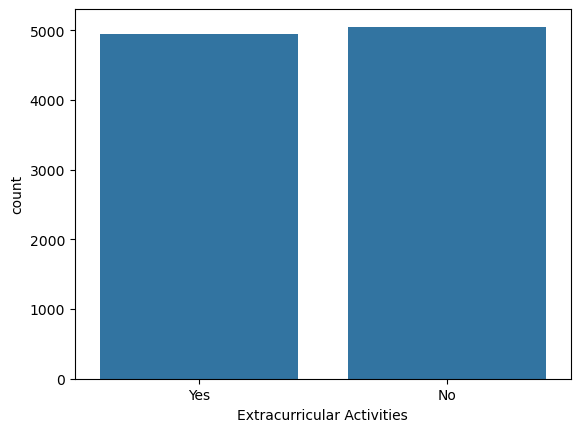

In [53]:
sns.countplot(x="Extracurricular Activities", data=df)

<Axes: xlabel='Previous Scores', ylabel='Performance Index'>

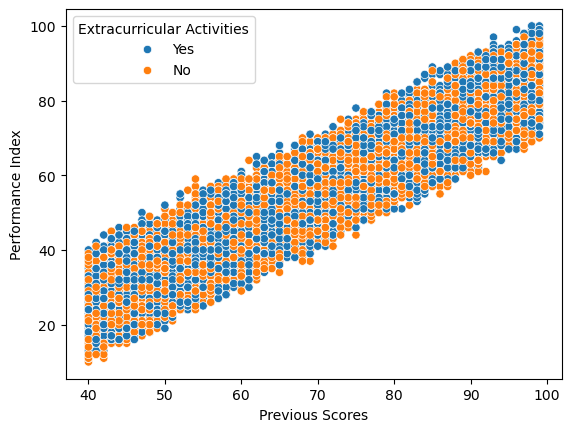

In [59]:
sns.scatterplot(x="Previous Scores" , y="Performance Index" ,data=df , hue= "Extracurricular Activities")


In [71]:
X= df[["Hours Studied","Previous Scores","Sleep Hours"]]

In [72]:
y=df[["Performance Index"]]

In [73]:
y.head()

,Performance Index
0,91.0
1,65.0
2,45.0
3,36.0
4,66.0


In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)


In [83]:
X_train

,Hours Studied,Previous Scores,Sleep Hours
9254,5,49,7
1561,2,48,7
1670,2,81,7
6087,2,46,6
6669,8,47,9
...,...,...,...
5734,8,50,6
5191,4,68,9
5390,9,48,7
860,1,47,9


In [79]:
y_train

,Performance Index
9254,36.0
1561,25.0
1670,59.0
6087,22.0
6669,40.0
...,...
5734,48.0
5191,51.0
5390,44.0
860,20.0


In [80]:
lr=LinearRegression()

In [82]:
lr.fit(X_train, y_train)

LinearRegression()

In [85]:
lr.predict([[5, 49, 7]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[34.68851322]])

In [87]:
lr.score(X_test, y_test)

0.9877353198949831

In [88]:
from sklearn.preprocessing import StandardScaler

In [92]:
scaler=StandardScaler()

In [93]:
scaler.fit(X_train)

StandardScaler()

In [94]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [95]:
X_train_scaled

array([[ 0.00645547, -1.18384439,  0.26988848],
       [-1.14974745, -1.24150571,  0.26988848],
       [-1.14974745,  0.66131759,  0.26988848],
       ...,
       [ 1.54805935, -1.24150571,  0.26988848],
       [-1.53514842, -1.29916702,  1.4474766 ],
       [-1.14974745, -1.35682833, -0.31890558]])

In [107]:
X_train_df = pd.DataFrame(X_train_scaled)
np.round((X_train_df).describe(),1)


,0,1,2
count,8000.0,8000.0,8000.0
mean,0.0,-0.0,0.0
std,1.0,1.0,1.0
min,-1.5,-1.7,-1.5
25%,-0.8,-0.9,-0.9
50%,0.0,0.0,0.3
75%,0.8,0.9,0.9
max,1.5,1.7,1.4


In [111]:
lr.fit(X_train_scaled,y_train)

LinearRegression()

In [117]:
lr.score(X_test_scaled,y_test)*100

98.77353198949831